In [1]:
from python.svmutil import *

In [2]:
from My_Explorer import *

In [3]:
from hog.hog import hog

In [4]:
import numpy as np

In [5]:
from ROC_plot.draw_plot import draw_roc_plot

In [6]:
from sklearn.metrics import roc_curve

In [7]:
dataset = MyExplorer(ipath,lpath)

In [8]:
train_x,train_y,valid_x,valid_y = dataset.split_single()

In [9]:
def get_hog(x):
    X = []
    for tmpx in x:
        normalised_blocks , hog_image = normalised_blocks,hog_image = \
            hog(tmpx, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(4, 4), visualize=True)
        X.append(normalised_blocks)
    X = np.array(X)
    return X

In [10]:
train_X = get_hog(train_x)

In [11]:
valid_X = get_hog(valid_x)

In [20]:
#best c in linear svm
def C_by_crossvalidation(X,Y):
    c_list = [0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
    for i in c_list: 
        #param = svm_parameter('-t 0 -c %f -b 1 -v 5'%i)
        #print(param)
        #print("c:",i)
        svm_train(Y,X,'-t 0 -c %f -b 1 -v 5'%i)

In [ ]:
C_by_crossvalidation(train_X,train_y)

Cross Validation Accuracy = 99.298%
Cross Validation Accuracy = 99.2892%
Cross Validation Accuracy = 99.2947%
Cross Validation Accuracy = 99.2925%
Cross Validation Accuracy = 99.2914%
Cross Validation Accuracy = 99.2914%
Cross Validation Accuracy = 99.2958%
Cross Validation Accuracy = 99.3265%
Cross Validation Accuracy = 99.3331%
Cross Validation Accuracy = 99.3539%


No handles with labels found to put in legend.


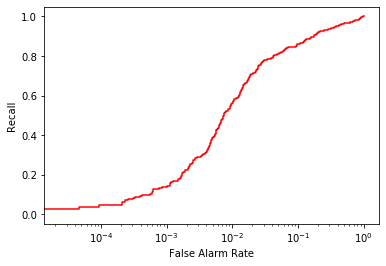

In [41]:
plt.xlabel('False Alarm Rate')
plt.ylabel('Recall')
fpr, tpr, threshold = roc_curve(valid_y,y_true)
plt.semilogx(fpr,tpr,color = 'red')
plt.legend(loc='upper right', frameon=False)
plt.show()

In [ ]:
def test_kernels():
    name_list = ['linear_c_0.5','linear_c_1','rbf_c_4_gamma_0.1','poly_c_4_gamma_0.1']
    param_list = ['-t 0 -c 0.5','-t 0 -c 1','-t 2 -c 4 -g 0.1','-t 1 -c 4 -g 0.1']
    n = 4 
    prob  = svm_problem(train_y, train_X)
    for i in range(n):
        m = svm_train(prob, param_list[i])
        p_labels, p_acc, p_vals = svm_predict(valid_y, valid_X, m,'-b 1')
        y_true = []
        for j in p_val:
            y_true.append(j[1])
        np.save(name_list[i]+'.npy',np.array(y_true))

In [ ]:
def find_rbf_param():
    name_list = ['rbf_c_0.25_gamma_0.001','rbf_c_0.25_gamma_0.01','rbf_c_0.25_gamma_0.1','rbf_c_0.25_gamma_1',
                'rbf_c_1_gamma_0.001','rbf_c_1_gamma_0.01','rbf_c_1_gamma_0.1','rbf_c_1_gamma_1',
                'rbf_c_4_gamma_0.001','rbf_c_4_gamma_0.01','rbf_c_4_gamma_0.1','rbf_c_4_gamma_1',
                'rbf_c_16_gamma_0.001','rbf_c_16_gamma_0.01','rbf_c_16_gamma_0.1','rbf_c_16_gamma_1']
    param_list = ['-t 2 -c 0.25 -g 0.001','-t 2 -c 0.25 -g 0.01','-t 2 -c 0.25 -g 0.1','-t 2 -c 0.25 -g 1',
                 '-t 2 -c 1 -g 0.001','-t 2 -c 1 -g 0.01','-t 2 -c 1 -g 0.1','-t 2 -c 1 -g 1',
                 '-t 2 -c 4 -g 0.001','-t 2 -c 4 -g 0.01','-t 2 -c 4 -g 0.1','-t 2 -c 4 -g 1',
                 '-t 2 -c 16 -g 0.001','-t 2 -c 16 -g 0.01','-t 2 -c 16 -g 0.1','-t 2 -c 16 -g 1']
    n = 16
    prob  = svm_problem(train_y, train_X)
    for i in range(n):
        m = svm_train(prob, param_list[i])
        p_labels, p_acc, p_vals = svm_predict(valid_y, valid_X, m,'-b 1')
        y_true = []
        for j in p_val:
            y_true.append(j[1])
        np.save(name_lis[i]t+'.npy',np.array(y_true))